In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## 1. Tải và xem dữ liệu

In [2]:
df = pd.read_csv('Downloads/creditcard.csv/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape


(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
((df.Class.value_counts()/df.shape[0])*100).round(2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [9]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
total_na = df.isnull().sum().sort_values(ascending = False)
percent_na = ((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending = False)
pd.concat([total_na, percent_na], axis =1 )

,0,1
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


Sơ qua về bộ dữ liệu:
    - Dữ liệu có 284807 quan sát và 31 cột
    - Bộ dữ liệu không có missing data
    - Dữ liệu cột Class mất cân bằng, số giao dịch gian lận chỉ chiếm 0.17% trong số 284,807 giao dịch
    - Số tiền giao dịch trung bình của mỗi giao dịch xấp xỉ 88 USD và 75% số giao dịch có số tiền dưới 77.16 USD
    

In [11]:
df_Fraud = df[df['Class'] == 1]
df_Not_Fraud = df[df['Class'] == 0]

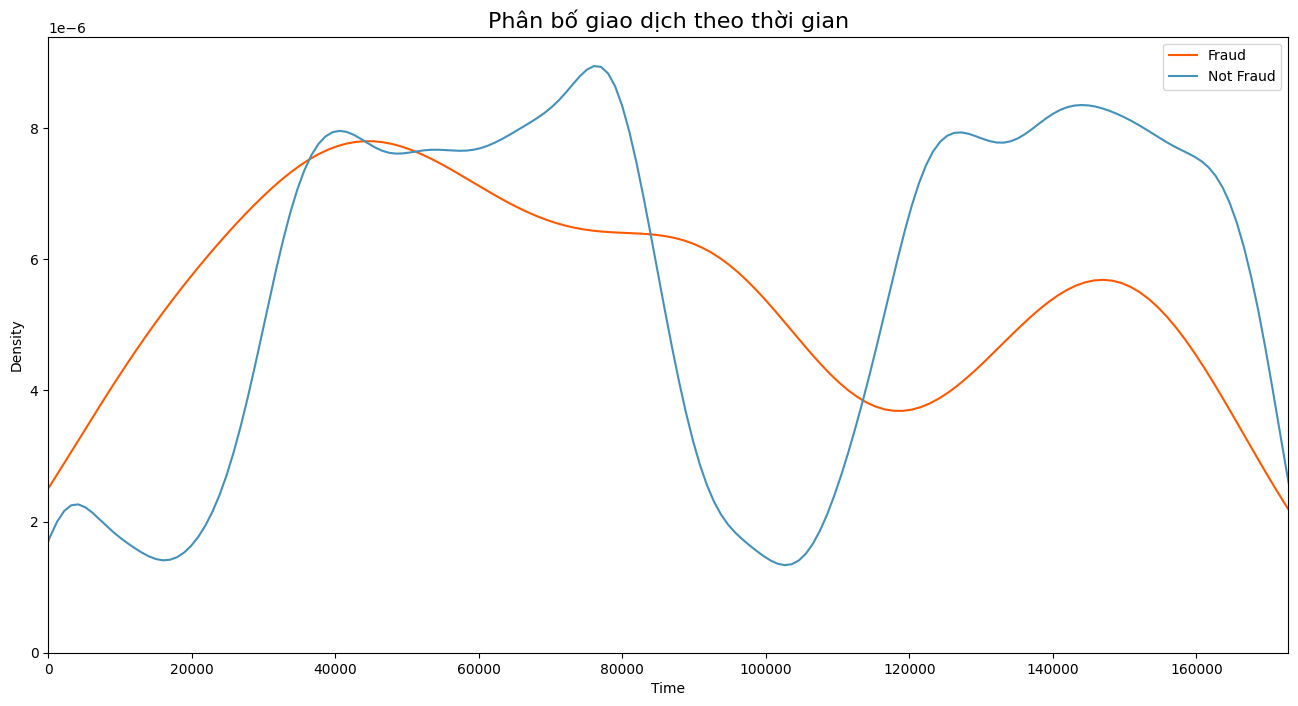

In [12]:
plt.figure(figsize = (16,8))
sns.distplot(df_Fraud['Time'], hist = False, color = '#FF5900', label = 'Fraud')
sns.distplot(df_Not_Fraud['Time'], hist = False, color = '#4491BB', label = 'Not Fraud')
plt.title('Phân bố giao dịch theo thời gian', fontsize = 16)
plt.xlim(min(df['Time']), max(df['Time']))
plt.legend(loc = 'best')

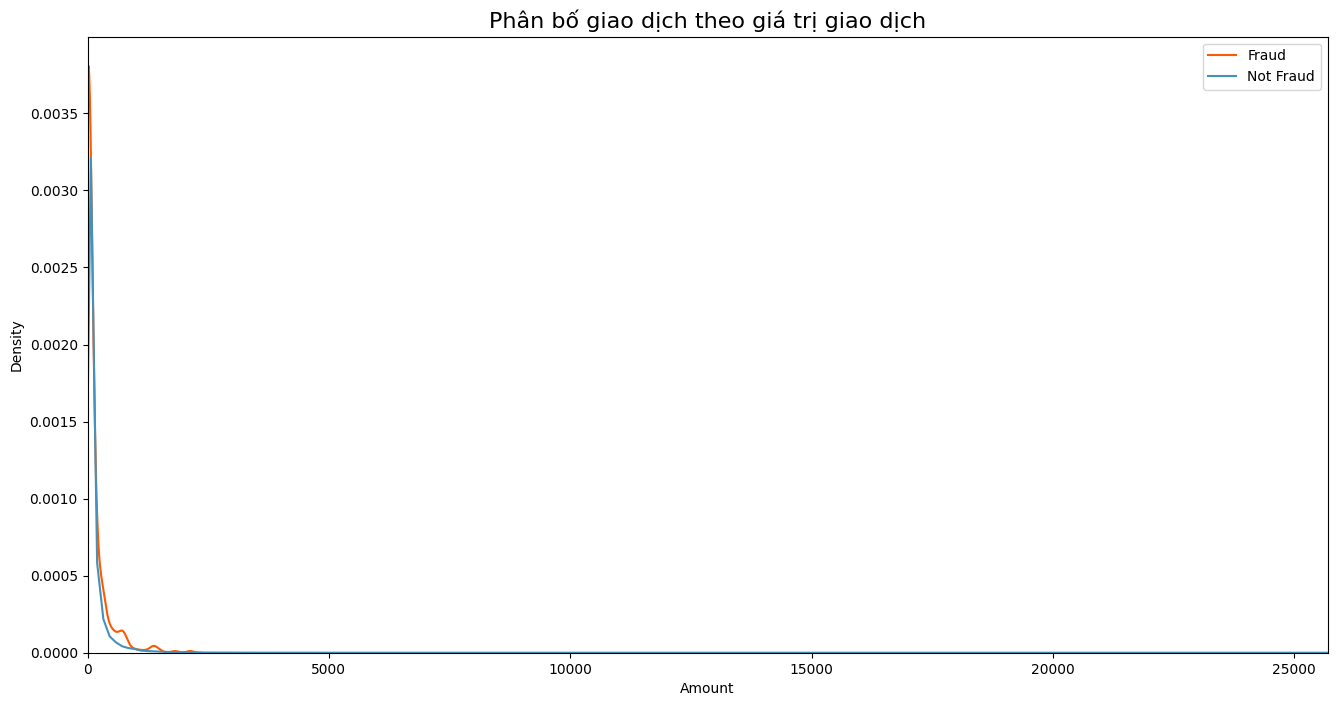

In [13]:
plt.figure(figsize = (16,8))
sns.distplot(df_Fraud['Amount'], color = '#FF5900', hist = False, label = 'Fraud')
sns.distplot(df_Not_Fraud['Amount'], color = '#4491BB', hist = False, label = "Not Fraud")
plt.title('Phân bố giao dịch theo giá trị giao dịch', fontsize = 16)
plt.xlim(min(df['Amount']), max(df['Amount']))
plt.legend()

Từ 2 biểu đồ trên ta thấy: 
    - các giao dịch gian lận có xu hướng phân bố đồng đều theo thời gian hơn các giao dịch không gian lận
    - các giao dịch gian lận có giá trị giao dịch có xu hướng cao hơn giao dịch không gian lận 

In [14]:
# kiểm tra tính chính xác từ 2 nhận xét trên hơn bằng vẽ biểu đồ chi tiết hơn

In [15]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))
# đổi sang đơn vị giờ

In [16]:
check = df.groupby(['Hour', 'Class'])['Amount'].agg(['min', 'max', 'mean', 'median', 'count', 'var', 'sum']).reset_index()
data = pd.DataFrame(check)
data.columns = ['Hour', 'Class', 'Min', 'Max', 'Mean', 'Median', 'Transaction', 'Variance', 'Sum']

In [17]:
data.head()

,Hour,Class,Min,Max,Mean,Median,Transaction,Variance,Sum
0,0.0,0,0.0,7712.43,64.774772,12.990,3961,45615.821201,256572.87
1,0.0,1,0.0,529.00,264.500000,264.500,2,139920.500000,529.00
2,1.0,0,0.0,1769.69,65.826980,22.820,2215,20053.615770,145806.76
3,1.0,1,59.0,239.93,149.465000,149.465,2,16367.832450,298.93
4,2.0,0,0.0,4002.88,68.803466,17.900,1555,45355.430437,106989.39


Text(0.5, 0.98, 'Tổng giá trị giao dịch theo thời gian')

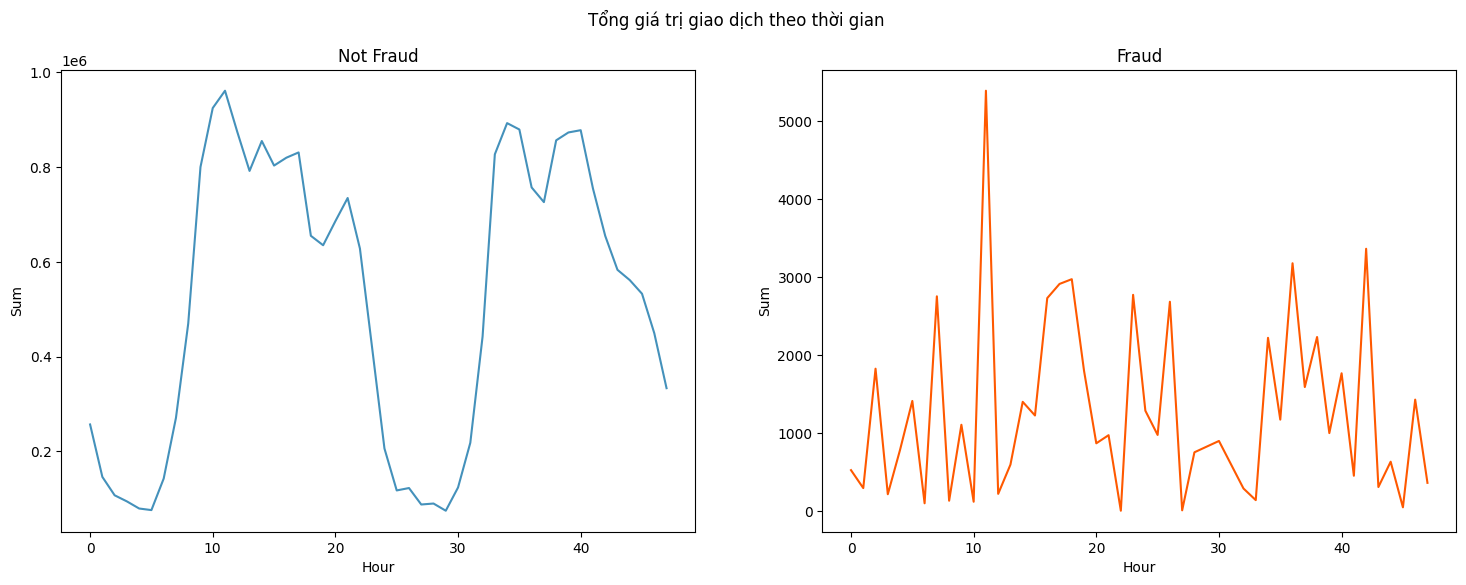

In [18]:
fig, ax = plt.subplots(ncols = 2, figsize = (18,6))
sns.lineplot(ax = ax[0],data = data[data['Class'] == 0], x = 'Hour', y = 'Sum', color = '#4491BB')
ax[0].set_title('Not Fraud')
sns.lineplot(ax = ax[1],data = data[data['Class'] == 1], x = 'Hour', y = 'Sum', color = '#FF5900')
ax[1].set_title('Fraud')
plt.suptitle('Tổng giá trị giao dịch theo thời gian')

Text(0.5, 0.98, 'Số giao dịch theo thời gian')

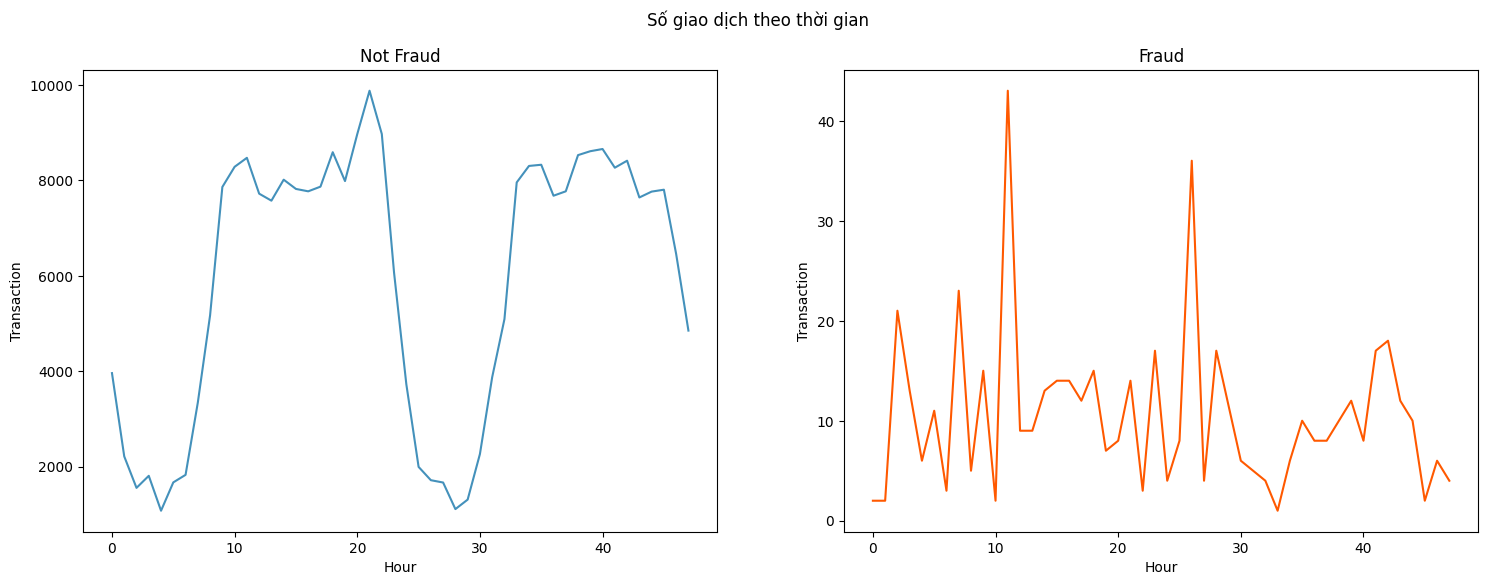

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = (18,6))
sns.lineplot(ax = ax[0],data = data[data['Class'] == 0], x = 'Hour', y = 'Transaction', color = '#4491BB')
ax[0].set_title('Not Fraud')
sns.lineplot(ax = ax[1],data = data[data['Class'] == 1], x = 'Hour', y = 'Transaction', color = '#FF5900')
ax[1].set_title('Fraud')
plt.suptitle('Số giao dịch theo thời gian')

Text(0.5, 0.98, 'Giá trị trung bình giao dịch theo thời gian')

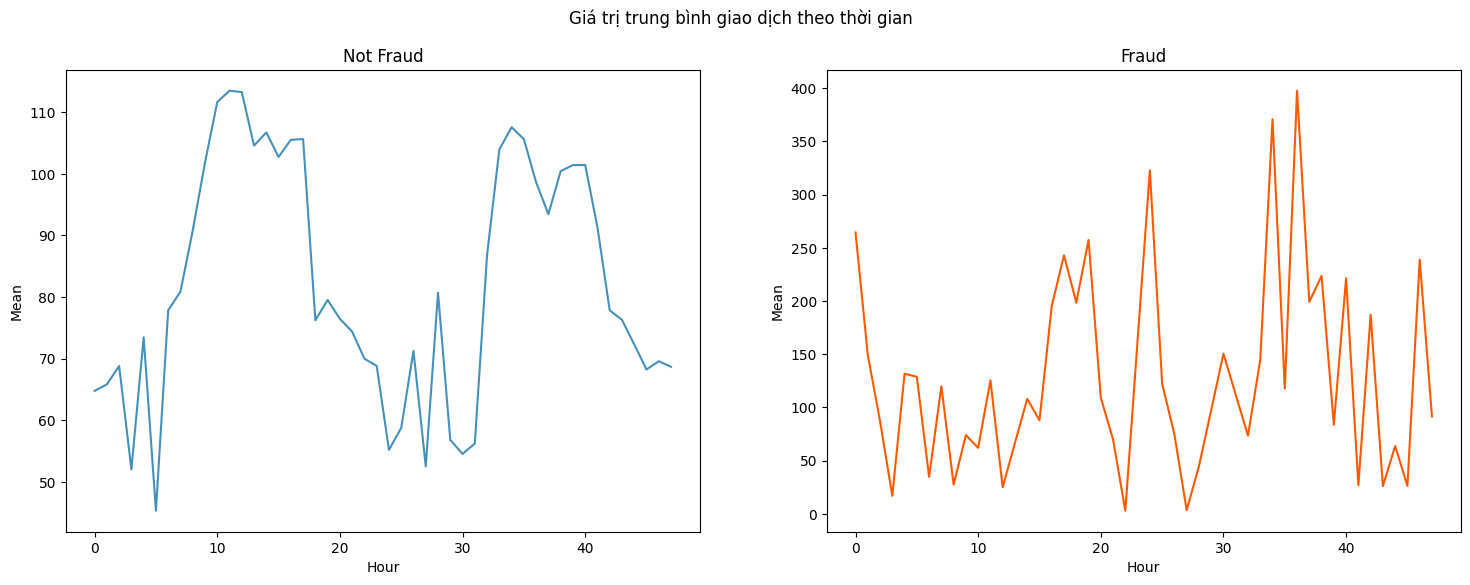

In [20]:
fig, ax = plt.subplots(ncols = 2, figsize = (18,6))
sns.lineplot(ax = ax[0],data = data[data['Class'] == 0], x = 'Hour', y = 'Mean', color = '#4491BB')
ax[0].set_title('Not Fraud')
sns.lineplot(ax = ax[1],data = data[data['Class'] == 1], x = 'Hour', y = 'Mean', color = '#FF5900')
ax[1].set_title('Fraud')
plt.suptitle('Giá trị trung bình giao dịch theo thời gian')

Text(0.5, 0.98, 'Giá trị giao dịch lớn nhất theo thời gian')

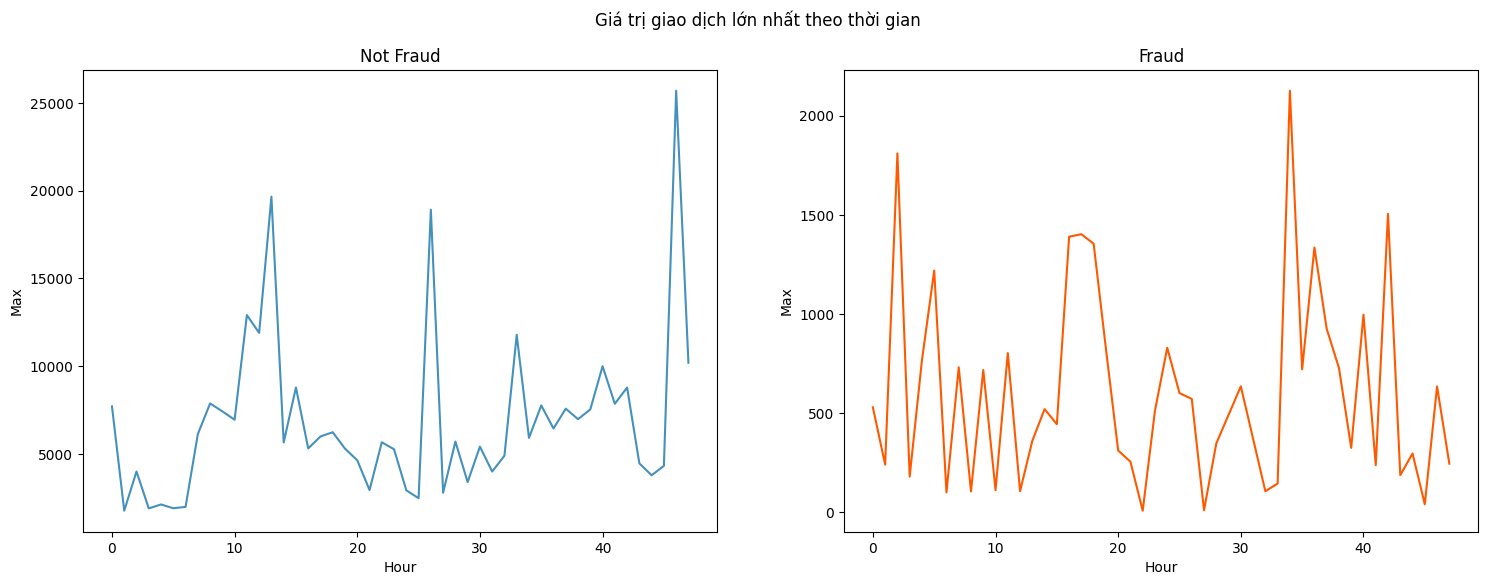

In [21]:
fig, ax = plt.subplots(ncols = 2, figsize = (18,6))
sns.lineplot(ax = ax[0],data = data[data['Class'] == 0], x = 'Hour', y = 'Max', color = '#4491BB')
ax[0].set_title('Not Fraud')
sns.lineplot(ax = ax[1],data = data[data['Class'] == 1], x = 'Hour', y = 'Max', color = '#FF5900')
ax[1].set_title('Fraud')
plt.suptitle('Giá trị giao dịch lớn nhất theo thời gian')

Text(0.5, 0.98, 'Giá trị giao dịch nhỏ nhất theo thời gian')

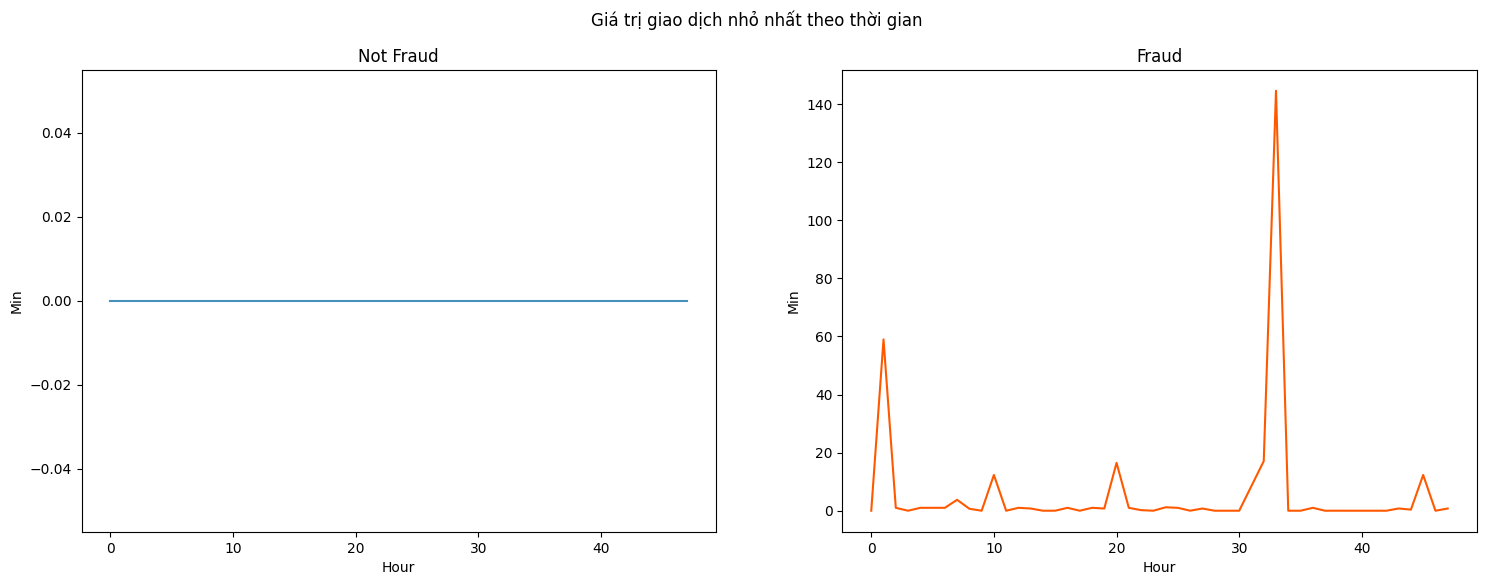

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize = (18,6))
sns.lineplot(ax = ax[0],data = data[data['Class'] == 0], x = 'Hour', y = 'Min', color = '#4491BB')
ax[0].set_title('Not Fraud')
sns.lineplot(ax = ax[1],data = data[data['Class'] == 1], x = 'Hour', y = 'Min', color = '#FF5900')
ax[1].set_title('Fraud')
plt.suptitle('Giá trị giao dịch nhỏ nhất theo thời gian')

Text(0.5, 0.98, 'Giá trị phương sai giá giao dịch theo thời gian')

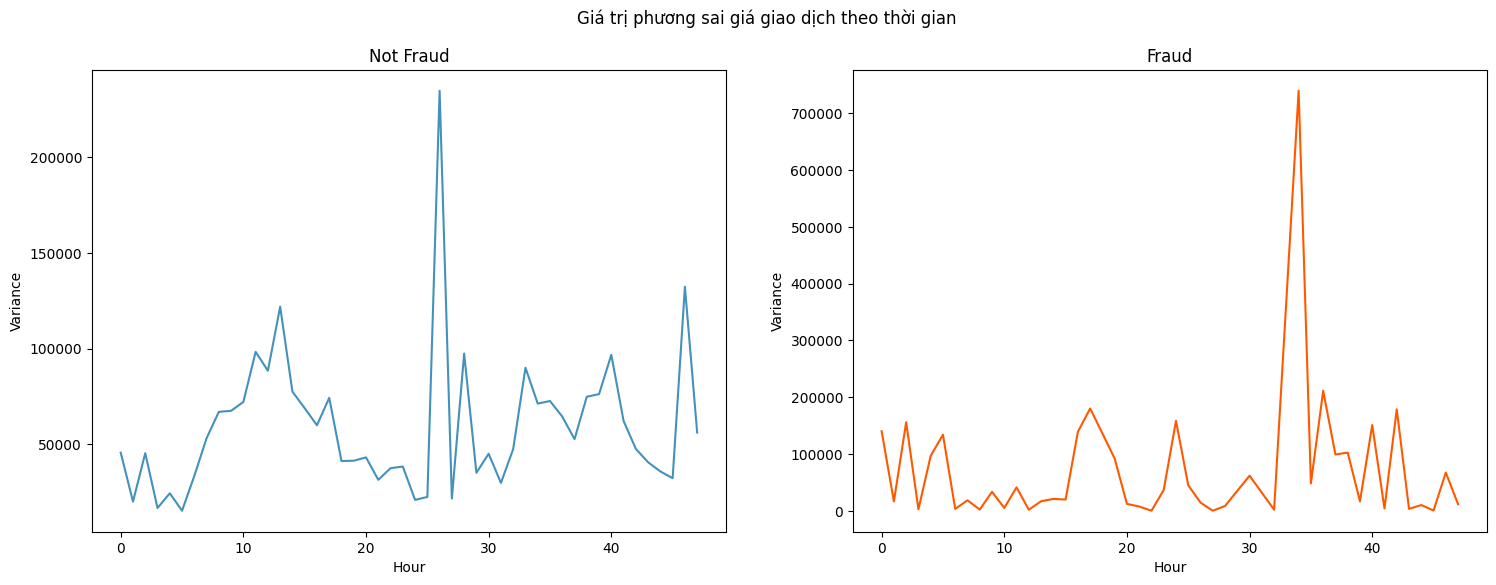

In [23]:
fig, ax = plt.subplots(ncols = 2, figsize = (18,6))
sns.lineplot(ax = ax[0],data = data[data['Class'] == 0], x = 'Hour', y = 'Variance', color = '#4491BB')
ax[0].set_title('Not Fraud')
sns.lineplot(ax = ax[1],data = data[data['Class'] == 1], x = 'Hour', y = 'Variance', color = '#FF5900')
ax[1].set_title('Fraud')
plt.suptitle('Giá trị phương sai giá giao dịch theo thời gian')

Nhận xét: -
    - Nhìn chung các giao dịch gian lận có xu hướng phân bố (số lượng giao dịch và giá trị giao dịch) đồng đều theo thời gian, các giao dịch không gian lận chủ yêu giao dịch trong giờ hành chính, rất ít giao dịch vào ban đêm và đêm muộn, sáng sớm.


In [24]:
df_Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
df_Not_Fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Nhận xét: 
    - Có sự khác biệt rõ rệt IQR của các giao dịch gian lận (104.89) và không gian lận ( 71.4)
    - Tứ phân vị của giao dịch gian lận có khoảng cách giá trị giao dịch chênh lệch lớn.

## scale dữ liệu của Amount và Time

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scale = RobustScaler()

In [29]:
df['Time'] = scale.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = scale.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop('Hour', axis = 1, inplace = True)

In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


# Chia Train test val và oversampling dữ liệu trên tập train

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
train_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X = df[train_cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [46]:
X_train.shape, X_val.shape

((182276, 30), (45569, 30))

In [48]:
sm = SMOTE( random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [49]:
y_train_resample.value_counts()

0    181946
1    181946
Name: Class, dtype: int64

# RandomForestClassifier

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [52]:
RFC = RandomForestClassifier(n_jobs= 4, 
                             random_state= 42,
                             n_estimators= 100,
                             verbose= False)

In [53]:
RFC.fit(X_train_resample, y_train_resample)
pred_RFC = RFC.predict(X_val)

In [54]:
roc_auc_score(y_val, pred_RFC)

0.9061620975716954

In [55]:
print(classification_report(y_val, pred_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45505
           1       0.87      0.81      0.84        64

    accuracy                           1.00     45569
   macro avg       0.93      0.91      0.92     45569
weighted avg       1.00      1.00      1.00     45569



# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression


In [57]:
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)
pred_log = model_log.predict(X_val)
print(classification_report(y_val, pred_log))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45505
           1       0.05      0.92      0.09        64

    accuracy                           0.97     45569
   macro avg       0.52      0.95      0.54     45569
weighted avg       1.00      0.97      0.99     45569



In [58]:
roc_auc_score(y_val, pred_log)

0.9478510259861554

# XGBoost

In [60]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train_resample, y_train_resample)

pred_xgb = model_xgb.predict(X_val)

print(classification_report( y_val, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45505
           1       0.79      0.86      0.82        64

    accuracy                           1.00     45569
   macro avg       0.89      0.93      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [61]:
roc_auc_score(y_val, pred_xgb)

0.9295226829469289

### Thử với các tham số khác nhau

In [62]:
xgb_train = xgb.DMatrix(X_train, y_train)
xgb_valid = xgb.DMatrix(X_val, y_val)


watchlist = [(xgb_train, 'train'), (xgb_valid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [63]:
model = xgb.train(params, 
                xgb_train, 
                1000, 
                watchlist, 
                early_stopping_rounds= 50, 
                maximize=True, 
                verbose_eval= 50)

[12:09:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.88014	valid-auc:0.87486
[50]	train-auc:0.91951	valid-auc:0.92951
[100]	train-auc:0.93605	valid-auc:0.93596
[150]	train-auc:0.97665	valid-auc:0.97069
[200]	train-auc:0.98816	valid-auc:0.98154
[214]	train-auc:0.98958	valid-auc:0.98045


In [64]:
params1 = {}
params1['objective'] = 'binary:logitraw'
params1['eta'] = 0.039
params1['max_depth'] = 2
params1['subsample'] = 0.8
params1['colsample_bytree'] = 0.9
params1['eval_metric'] = 'auc'
params1['random_state'] = 42

In [65]:
model = xgb.train(params1, 
                xgb_train, 
                1000, 
                watchlist, 
                early_stopping_rounds= 50, 
                maximize=True, 
                verbose_eval= 50)

[0]	train-auc:0.88015	valid-auc:0.87486
[50]	train-auc:0.91951	valid-auc:0.92951
[100]	train-auc:0.93330	valid-auc:0.93615
[150]	train-auc:0.97613	valid-auc:0.97048
[200]	train-auc:0.98799	valid-auc:0.98310
[248]	train-auc:0.99155	valid-auc:0.98256


In [66]:
params2 = {}
params2['objective'] = 'binary:logitraw'
params2['eta'] = 0.039
params2['max_depth'] = 6
params2['subsample'] = 0.9
params2['colsample_bytree'] = 0.9
params2['eval_metric'] = 'auc'
params2['random_state'] = 42

In [68]:
model = xgb.train(params2, 
                xgb_train, 
                500, 
                watchlist, 
                early_stopping_rounds= 50, 
                maximize=True, 
                verbose_eval= 50)

[0]	train-auc:0.91504	valid-auc:0.92956
[50]	train-auc:0.92255	valid-auc:0.92952
[55]	train-auc:0.92255	valid-auc:0.92952


In [69]:
model = xgb.train(params1, 
                xgb_train, 
                200, 
                watchlist, 
                early_stopping_rounds= 50, 
                maximize=True, 
                verbose_eval= 10)

[0]	train-auc:0.88015	valid-auc:0.87486
[10]	train-auc:0.88778	valid-auc:0.87491
[20]	train-auc:0.91497	valid-auc:0.92951
[30]	train-auc:0.91800	valid-auc:0.92951
[40]	train-auc:0.91951	valid-auc:0.92950
[50]	train-auc:0.91951	valid-auc:0.92951
[60]	train-auc:0.91943	valid-auc:0.92945
[70]	train-auc:0.91932	valid-auc:0.92937
[80]	train-auc:0.92216	valid-auc:0.92919
[90]	train-auc:0.92492	valid-auc:0.92897
[100]	train-auc:0.93330	valid-auc:0.93615
[110]	train-auc:0.94971	valid-auc:0.93451
[120]	train-auc:0.96563	valid-auc:0.95337
[130]	train-auc:0.96561	valid-auc:0.95258
[140]	train-auc:0.96956	valid-auc:0.96572
[150]	train-auc:0.97613	valid-auc:0.97048
[160]	train-auc:0.97813	valid-auc:0.97696
[170]	train-auc:0.98042	valid-auc:0.97690
[180]	train-auc:0.98513	valid-auc:0.97699
[190]	train-auc:0.98667	valid-auc:0.98181
[199]	train-auc:0.98782	valid-auc:0.98344


### chọn tham số params1, số cây 199 vì có AUC cao nhất 0.983

In [79]:
model_XGB = xgb.XGBClassifier(objective = 'binary:logitraw', eta = 0.039, max_depth = 2, subsample = 0.8, 
                              colsample_bytree = 0.9, random_state = 42, n_estimators=199)

In [80]:
model_XGB.fit(X_train_resample, y_train_resample)

y_pred = model_XGB.predict(X_test)


In [81]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [82]:
roc_auc_score(y_test, y_pred)

0.9484365848196341

In [86]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model XGB AUC score: 0.9484365848196341


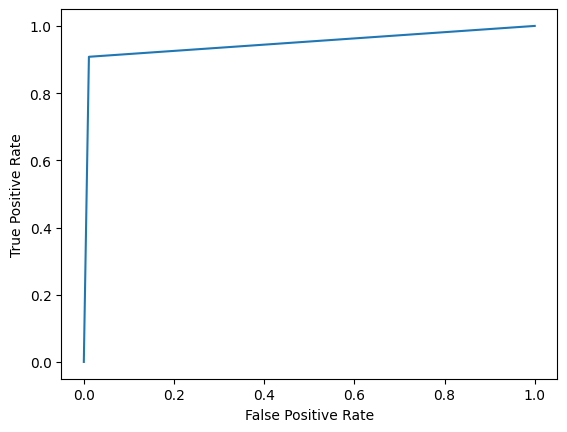

In [89]:
plot_roc_curve(y_test, y_pred)
print(f'model XGB AUC score: {roc_auc_score(y_test, y_pred)}')

# Kết luận:
    - Các giao dịch gian lận có xư hướng giao dịch đồng đều theo thời gian, tứ phân vị có sự khác nhau về giá trị giao dịch lớn.
    Dự đoán:
    - Scale các trường như Amount và Time
    - Chia tập dữ liệu thành train, test và val
    - oversampling trên tập train
    - sử dụng thuật toán  RandomForest, Logistic Regression và XGBoost đánh giá trên tập val và cho kết quả XGBoost có điểm số AUC cao nhất 0.983
    - KHi áp dụng mô hình thuật toán XGBoost trên tập test và thu được AUC giảm xuống chỉ còn 0.948